In [28]:
hotel = read.table("hotel.txt", sep = ",")
lm_h = lm(enrgcons ~ area, hotel); 
summary(lm_h)


Call:
lm(formula = enrgcons ~ area, data = hotel)

Residuals:
     Min       1Q   Median       3Q      Max 
-4355890  -872098     1538  1305292  3148838 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -538035.42 1085087.38  -0.496    0.626    
area            159.25      20.96   7.599 7.29e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2102000 on 17 degrees of freedom
Multiple R-squared:  0.7726,	Adjusted R-squared:  0.7592 
F-statistic: 57.75 on 1 and 17 DF,  p-value: 7.294e-07


Yes, the slope coefficients p-value is $< 0.05$ therefore we have strong evidence against the null hypothesis. 

The slope coefficient is the avg change in energy consumption associate with a $1$-unit increase. Therefore one square meter increase will increase the energy consumption by $159.25 \times 1 = 159.25$ kilowatt-hours

In [26]:
hova= anova(lm_h)
rss =hova[2,2]
tss = sum(hova$`Sum Sq`)
r = 1 - rss/tss

$77\%$

In [36]:
lm_m = lm(enrgcons ~ numrooms + area + age, hotel)
summary(lm_m)


Call:
lm(formula = enrgcons ~ numrooms + area + age, data = hotel)

Residuals:
     Min       1Q   Median       3Q      Max 
-3767734  -638009   492081   949224  3214282 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -828513.80 1958786.74  -0.423 0.678316    
numrooms      -6087.90    6500.87  -0.936 0.363863    
area            196.19      40.34   4.863 0.000207 ***
age          111834.20  133440.71   0.838 0.415140    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2112000 on 15 degrees of freedom
Multiple R-squared:  0.7974,	Adjusted R-squared:  0.7569 
F-statistic: 19.68 on 3 and 15 DF,  p-value: 1.853e-05


Yes, there is an increase in area. 

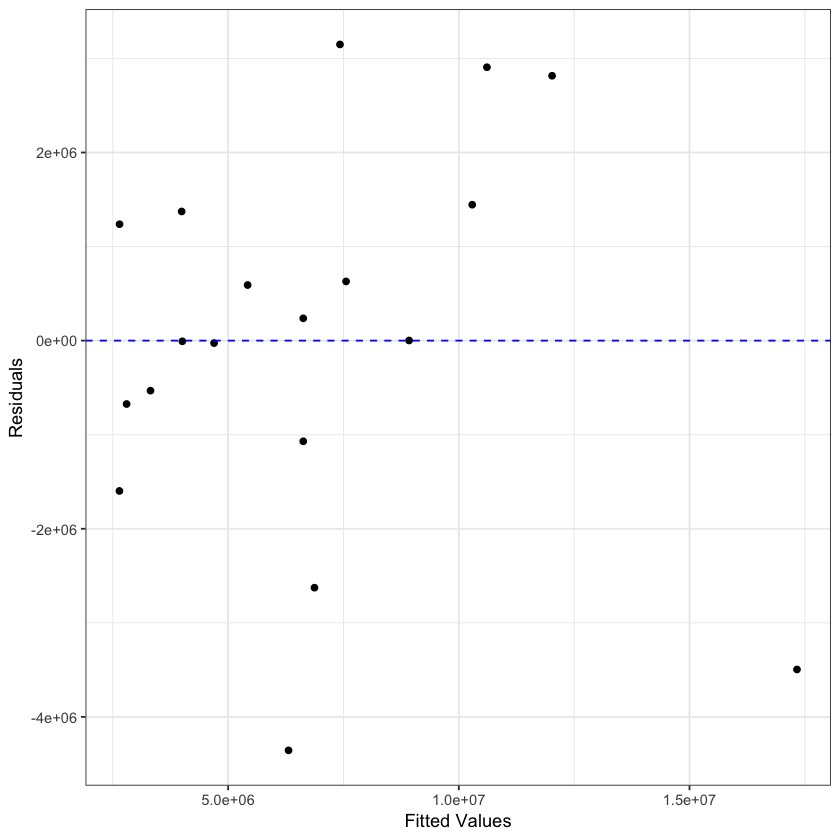

In [41]:
library(gridExtra)
library(ggplot2)
y = hotel$enrgcons; 
# Y = XB
X = cbind(1, hotel$area)
beta1 = solve(t(X)%*%X)%*%t(X)%*%y
yHat = X%*%beta1 # fitted values
residuals = y - yHat # residuals





endemic = data.frame(yHat, residuals)

p2 = ggplot(endemic, aes(x = yHat, y = residuals)) + geom_point() + 
    theme_bw() + 
    geom_hline(yintercept=0, linetype="dashed", color = "blue") + 
    ylab("Residuals") + 
    xlab("Fitted Values")
p2

No, the model seems to be pretty good in keep values close to 0. 

yes, it is saying that the number of guestrooms does not have an association in energy consumption, however, in reality more guestrooms means more energy consumption. 

In [43]:
lm_reduced = lm_h
lm_full = lm_m
anova(lm_reduced, lm_full)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
17,7.512937e+13,NA,NA,NA,NA
15,6.693065e+13,2,8.198719e+12,0.9187179,0.4203536


That the reduced model is sufficient. 

# Question 4 #